# Face Recognition

In [ ]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=cc03be47d71f0d3fb57cbb2d3e1cde68b792debd8dfce4effc2e3fe7d9588c76
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
# define our imshow function

def imshow(title = "Image",image = None,size = 7):

  w,h = image.shape[0],image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

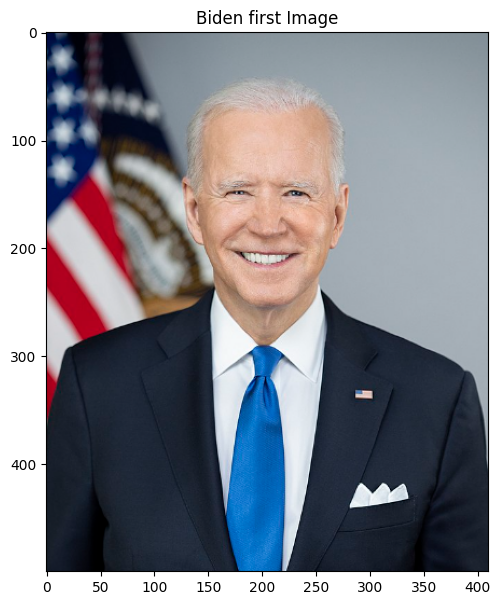

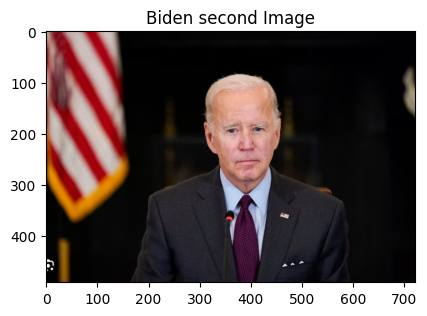

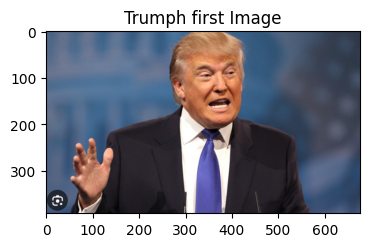

In [ ]:
biden1 = cv2.imread("/content/biden1.png")
biden2 = cv2.imread("/content/biden2.png")
trumph = cv2.imread("/content/trumph.png")

imshow("Biden first Image",biden1)
imshow("Biden second Image",biden2)
imshow("Trumph first Image",trumph)

In [ ]:
import face_recognition



## Recognize faces in Images

## Similar and non similar Images

In [ ]:
known_image = face_recognition.load_image_file("/content/biden1.png")
unknown_image = face_recognition.load_image_file("/content/biden2.png")


biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding],unknown_encoding)

print("Face Match is :",result[0])

Face Match is : True


In [ ]:
known_image = face_recognition.load_image_file("/content/biden1.png")
unknown_image = face_recognition.load_image_file("/content/trumph.png")


biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding],unknown_encoding)

print("Face Match is :",result[0])

Face Match is : False


In [ ]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-11-24 02:04:53--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.94, 52.95.149.58, 3.5.244.142, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  11.9MB/s    in 2.4s    

2023-11-24 02:04:57 (11.9 MB/s) - ‘images.zip’ saved [29586716/29586716]



## Blur Detection Score

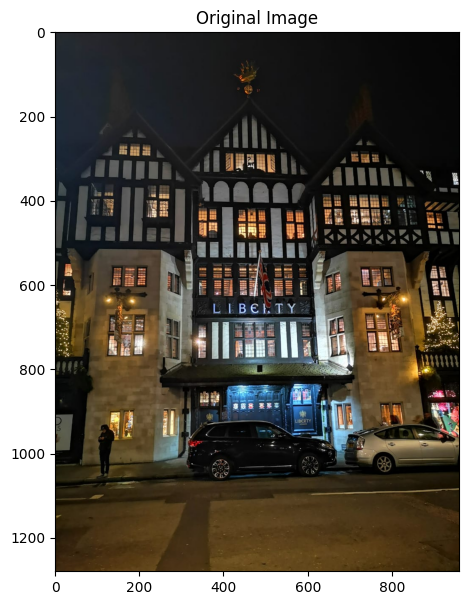

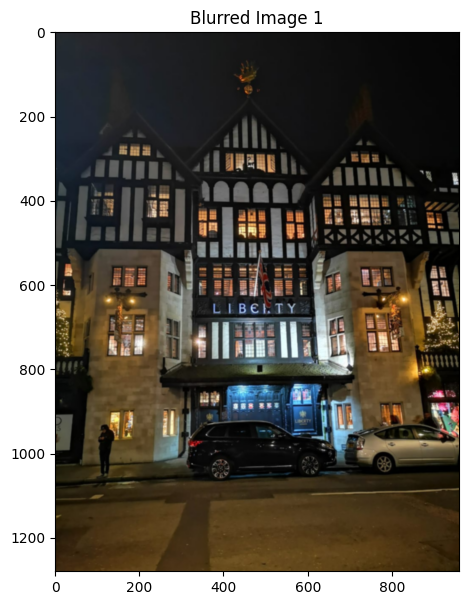

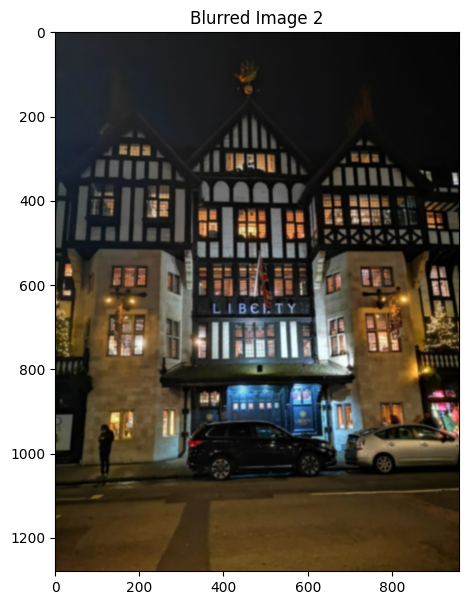

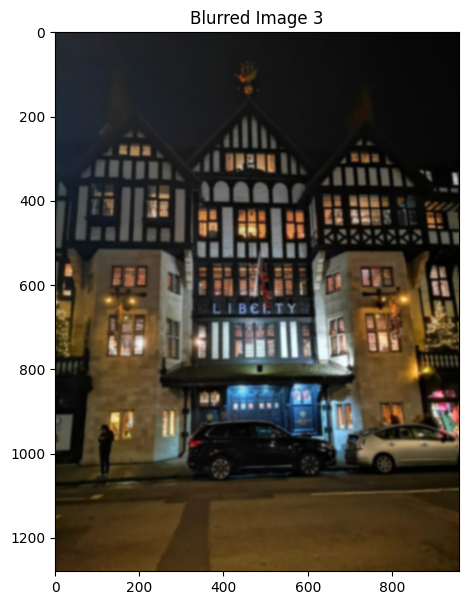

In [ ]:
image = cv2.imread("/content/images/liberty.jpeg")
imshow("Original Image",image)

blur_1 = cv2.GaussianBlur(image,(5,5),0)
imshow("Blurred Image 1",blur_1)

blur_2 = cv2.GaussianBlur(image,(9,9),0)
imshow("Blurred Image 2",blur_2)

blur_3 = cv2.GaussianBlur(image,(13,13),0)
imshow("Blurred Image 3",blur_3)

In [ ]:
def getblurscore(image):
  if len(image.shape) == 3:
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image,cv2.CV_64F).var()

# Remember Higher is less Blur

In [ ]:
print("Blur Score For Original Image : ",getblurscore(image))  # blur on lesser side , score on higher side
print("Blur Score For blur1 Image : ",getblurscore(blur_1))
print("Blur Score For blur2 Image : ",getblurscore(blur_2))
print("Blur Score For blur3 Image : ",getblurscore(blur_3))     # blur on higher side , score on lesser side

Blur Score For Original Image :  894.1643803618214
Blur Score For blur1 Image :  64.20102699531715
Blur Score For blur2 Image :  14.90084552899931
Blur Score For blur3 Image :  6.293340649969713


## ISO

In [ ]:
"""

Digital Camera are sensors can take picture in low light env by increasing the
sensitivity of camea lense & that comes with a price of Noise.

"""

In [ ]:
import random

In [ ]:
# adding noise to images

def addnoise(image):
  global prob,rnd

  prob = random.uniform(0.05,0.1)
  rnd = np.random.rand(image.shape[0],image.shape[1])

  # if random values in our random matrix are less than or random probability
  # we randomly change that pixel with a value within range specified

  image[rnd<prob] = np.random.randint(50,230)
  return image



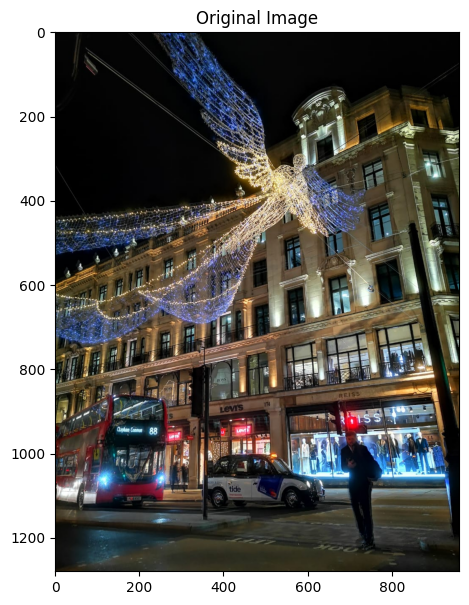

In [ ]:
image = cv2.imread("/content/images/londonxmas.jpeg")
imshow("Original Image",image)

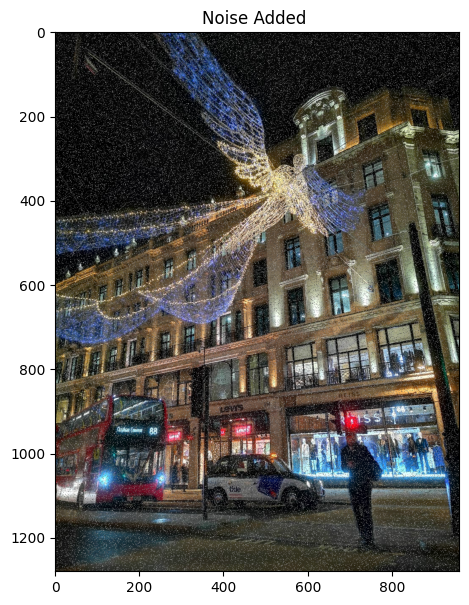

In [ ]:
noise_1 = addnoise(image)
imshow("Noise Added ",noise_1)

In [ ]:
# none = Fliter strength
# hcolor components
# template window size
# search window size

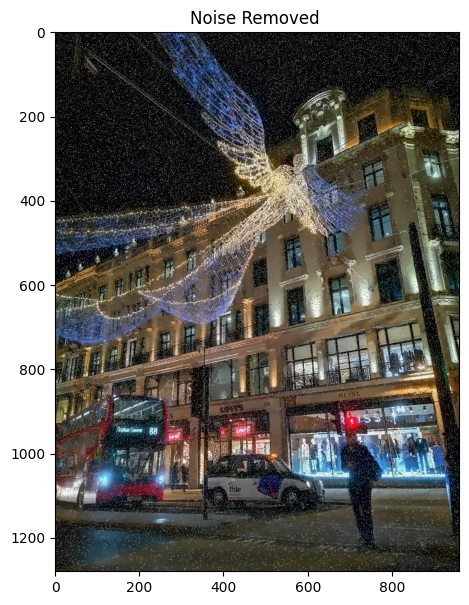

In [ ]:
dst = cv2.fastNlMeansDenoisingColored(noise_1,None,11,6,7,21)

imshow("Noise Removed ",dst)

## Restoring the images

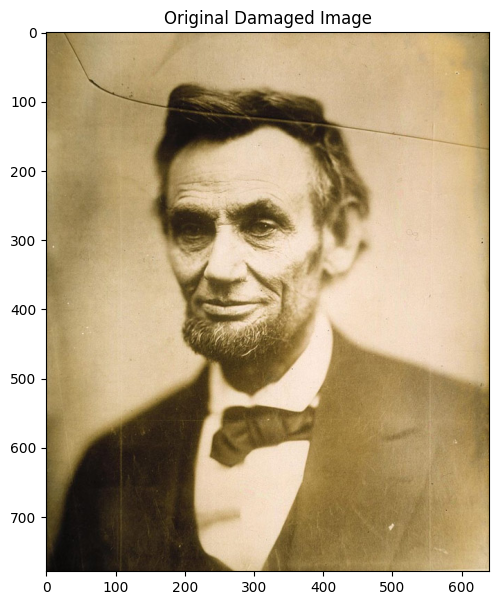

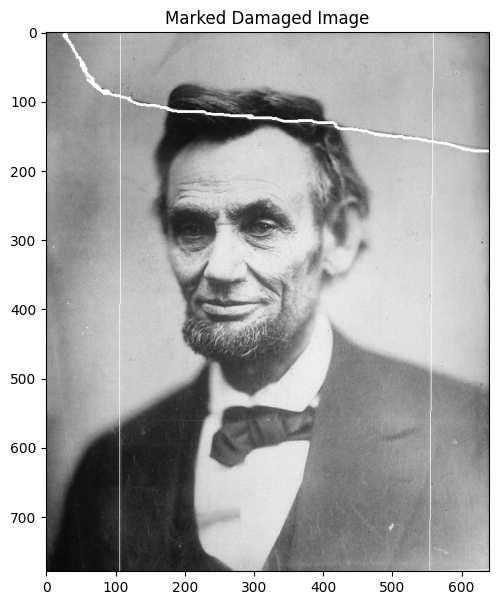

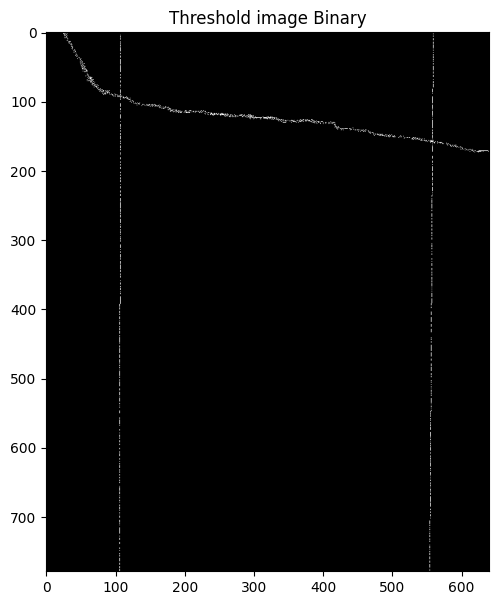

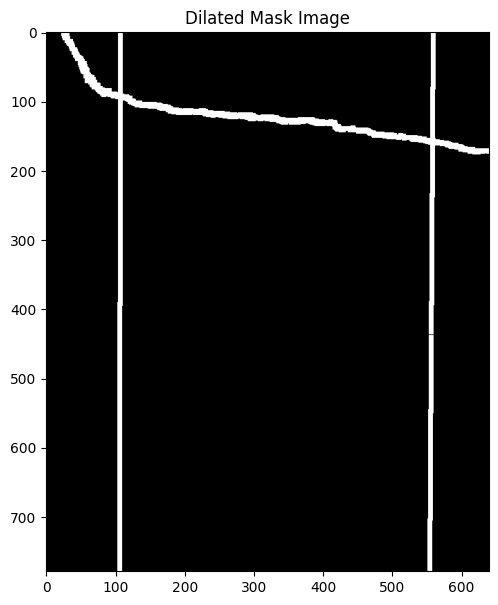

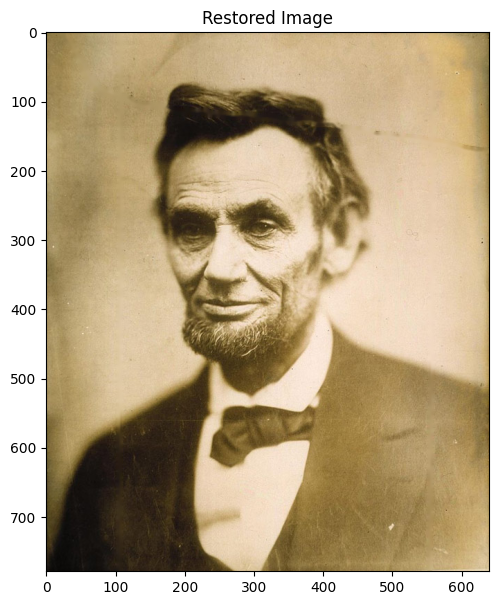

In [ ]:
image = cv2.imread("/content/images/abraham.jpg")
imshow("Original Damaged Image",image)

marked_image = cv2.imread("/content/images/mask.jpg",0)
imshow("Marked Damaged Image",marked_image)


ret,thresh1 = cv2.threshold(marked_image,254,255,cv2.THRESH_BINARY)
imshow("Threshold image Binary",thresh1)

# lets dilate
kernel = np.ones((7,7),np.uint8)
mask = cv2.dilate(thresh1,kernel,iterations = 1)
imshow("Dilated Mask Image",mask )

cv2.imwrite("lincon_masked.png",mask)

restore_image = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)

imshow("Restored Image",restore_image)

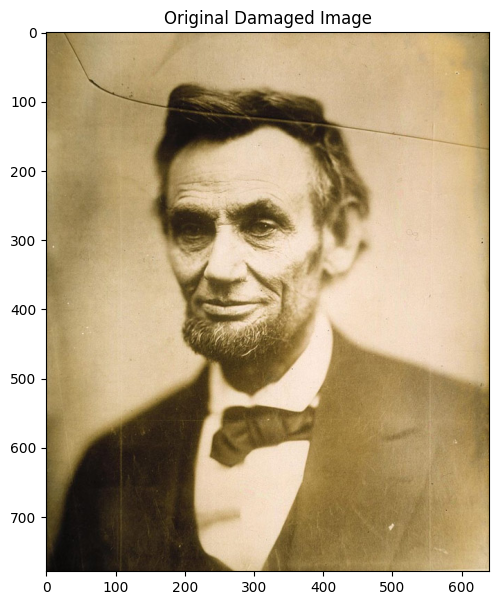

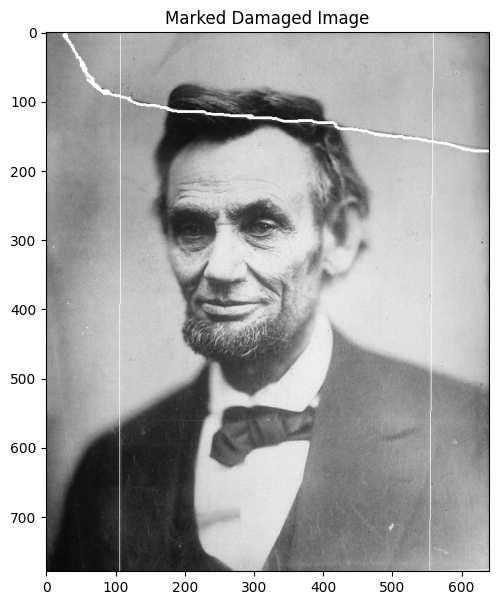

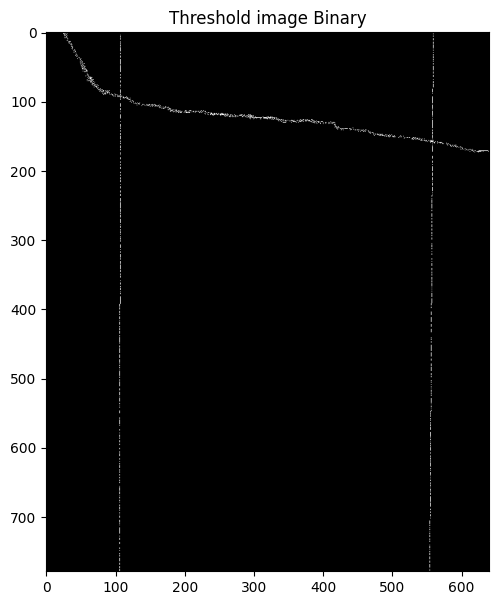

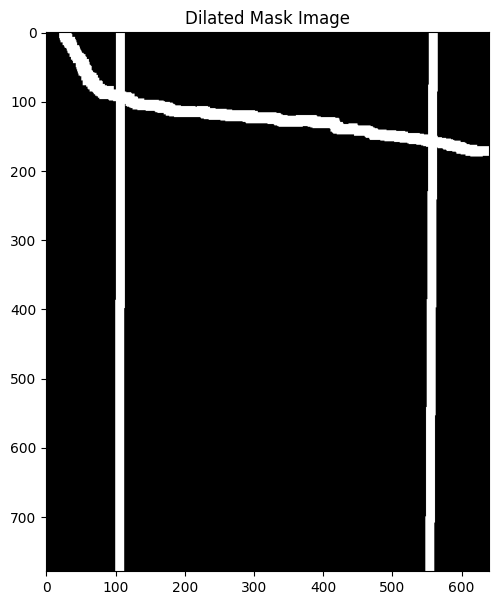

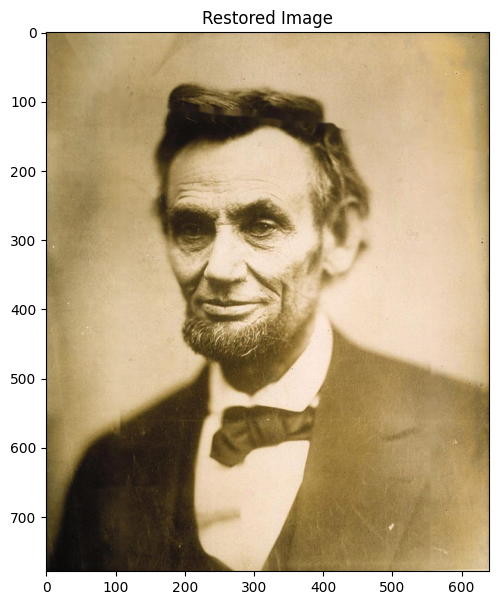

In [ ]:
image = cv2.imread("/content/images/abraham.jpg")
imshow("Original Damaged Image",image)

marked_image = cv2.imread("/content/images/mask.jpg",0)
imshow("Marked Damaged Image",marked_image)


ret,thresh1 = cv2.threshold(marked_image,254,255,cv2.THRESH_BINARY)
imshow("Threshold image Binary",thresh1)

# lets dilate
kernel = np.ones((7,7),np.uint8)
mask = cv2.dilate(thresh1,kernel,iterations = 2)
imshow("Dilated Mask Image",mask )

cv2.imwrite("lincon_masked.png",mask)

restore_image = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)

imshow("Restored Image",restore_image)